# Final Project

The final project is an opportunity for you to explore how political campaigns and political journalists apply data science. This is meant to be an open-ended assignment. You are to pick a topic from the world of politics (can be broader than just campaigns or American politics) and write a data-intensive paper (think blog post, e.g., Nate Cohn at the NYT's Upshot) exploring these questions, describing the methodology you employ to answer the question, the results, and finally the conclusions you can draw from the analysis. The paper should be around 5-8 pages (double-spaced), inclusive of any figures or tables and excluding your code.

The final project must involve original data analysis conducted in Python where you find or create a data source(s), analyze data, visualize data, and describe your results. Good final papers will combine substantive knowledge of the question with high-quality data and analytics. You must submit your code along with your final paper.

In this notebook, I provide you access to two data sources that you may use. You may use either of these, other sources, or integrate them with additional data. I am providing this data to help you get started, but it is not a requirement that you use these data sources. The only requirement is that you use some real political data.

## Source #1: Cooperative Election Study

One promising data source is the Cooperative Election Study. This is a large N survey that's been conducted over multiple years. I am providing you data for 2010-2020. Each year has around 20,000 observations.

The Cooperative Election Study consists of two waves in election years. The pre-election wave is in the field from late September to late October. The post-election wave is administered in November. Within a given election, the same people take the survey pre- and post-election. Across elections, these are different respondents.

To help you get started, I have uploaded a version of the Cooperative Election Study (`CCES_data_for_final_project.csv`). See below for how to read the data. Note that some questions have missing data because not all questions were asked in every year and state. For example, if there wasn't a gubernatorial question in a certain state-year, that data will be missing. Make sure you review the codebook: `data_dictionary.csv`.

You can read more about the survey [here](https://github.com/joshuakalla/data_science_campaigns/blob/master/Final_Project/guide_cumulative_2006-2023.pdf).

## Source #2: American National Election Studies

A second promising data source is the American National Election Studies. This is a smaller N but very high quality survey. I am providing data from the ANES 2016-2020 panel. In this survey, the same respondents took a pre-2016 election survey, a post-2016 election survey, a pre-2020 election survey, and a post-2020 election survey. You can read more about the survey [here](https://electionstudies.org/data-center/2016-2020-panel-merged-file/).

The data for this survey is called `ANES_2020.csv`. To interpret the data, make sure you review the codebook: `anes_reduced_codebook.txt`.


# Reading the Cooperative Election Study

In [2]:
import pandas as pd
data_ces = pd.read_csv("https://raw.githubusercontent.com/joshuakalla/data_science_campaigns/refs/heads/master/Final_Project/CCES_data_for_final_project.csv")
data_ces.head()

,year,case_id,weight_cumulative,st,pid7,ideo5,gender,birthyr,race,educ,...,voted_pres_party,intent_turnout_self,voted_turnout_self,vv_turnout_gvm,intent_rep_party,voted_rep_party,intent_gov_party,voted_gov_party,intent_sen_party,voted_sen_party
0,2010,12274,0.189605,MI,Lean Republican,Very Conservative,Male,1968,White,Some College,...,Republican,NaN,Yes,Voted,Republican,Republican,Republican,Republican,NaN,NaN
1,2010,16008,1.112055,CA,Lean Democrat,Liberal,Male,1979,White,4-Year,...,Democratic,NaN,Yes,Voted,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic
2,2010,54292,0.387745,FL,Not Very Strong Republican,Conservative,Female,1952,White,4-Year,...,Republican,NaN,Yes,Voted,Republican,Republican,Republican,Republican,Republican,Republican
3,2010,1708,0.065135,MO,Lean Republican,Very Conservative,Male,1953,White,4-Year,...,Republican,NaN,Yes,No Record of Voting,Republican,NaN,NaN,NaN,Republican,NaN
4,2010,68960,0.051150,OK,Strong Democrat,Liberal,Male,1955,Hispanic,Post-Grad,...,Democratic,NaN,Yes,Voted,Democratic,NaN,Democratic,NaN,Democratic,NaN


In [3]:
dictionary_ces = pd.read_csv("https://raw.githubusercontent.com/joshuakalla/data_science_campaigns/refs/heads/master/Final_Project/data_dictionary.csv")
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
dictionary_ces

,Variable,Label
0,year,Survey Year
1,case_id,Survey Respondent
2,weight_cumulative,Survey Weight
3,st,State
4,pid7,Partisan identity (7 point)
5,ideo5,Ideology (5 point)
6,gender,Sex
7,birthyr,Year of Birth
8,race,Race
9,educ,Education


<ipython-input-15-a897238e7b4f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ces_subset.loc[:, 'party'] = ces_subset['pid7'].map(party_mapping)


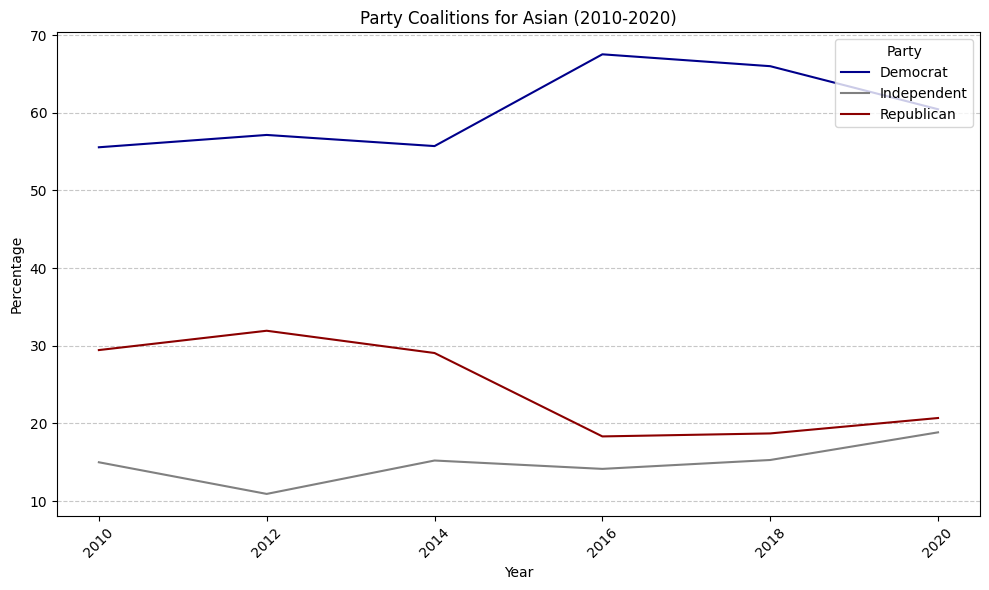

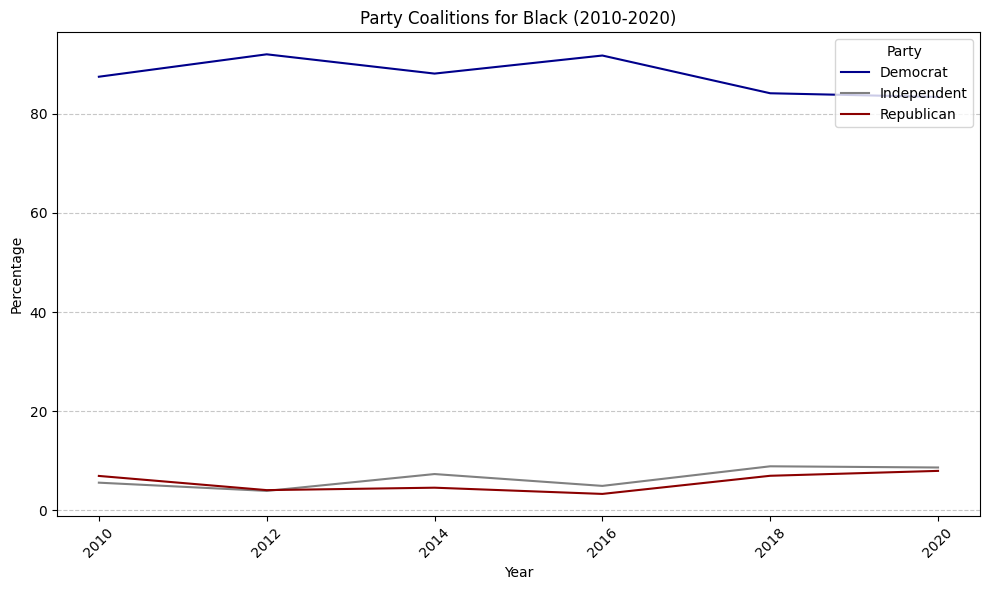

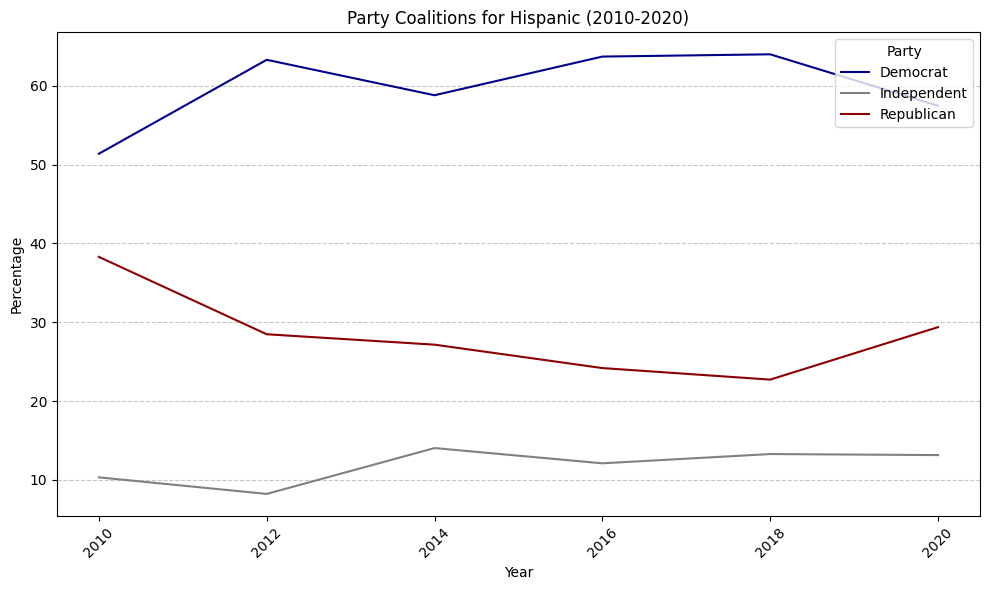

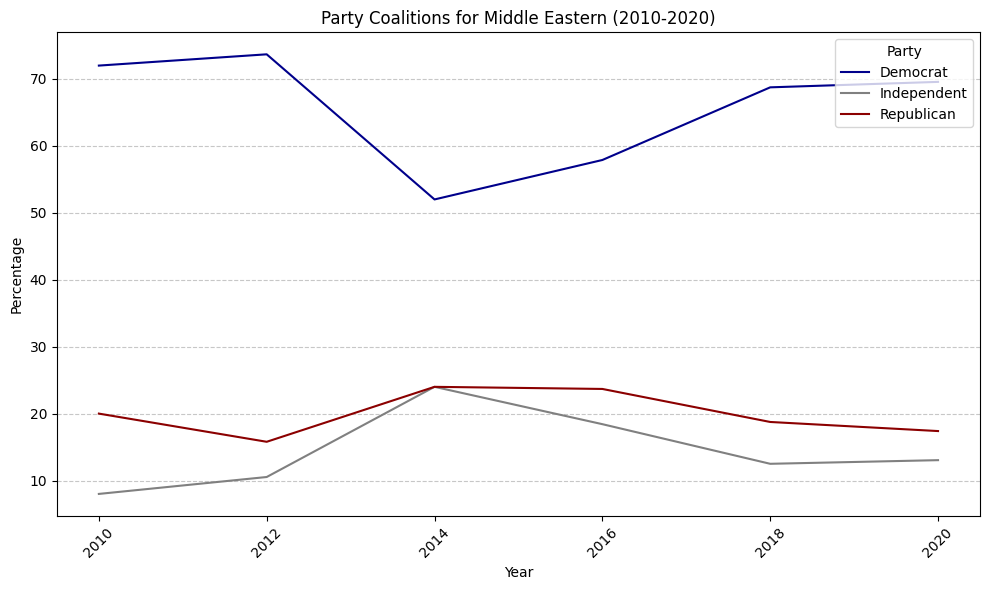

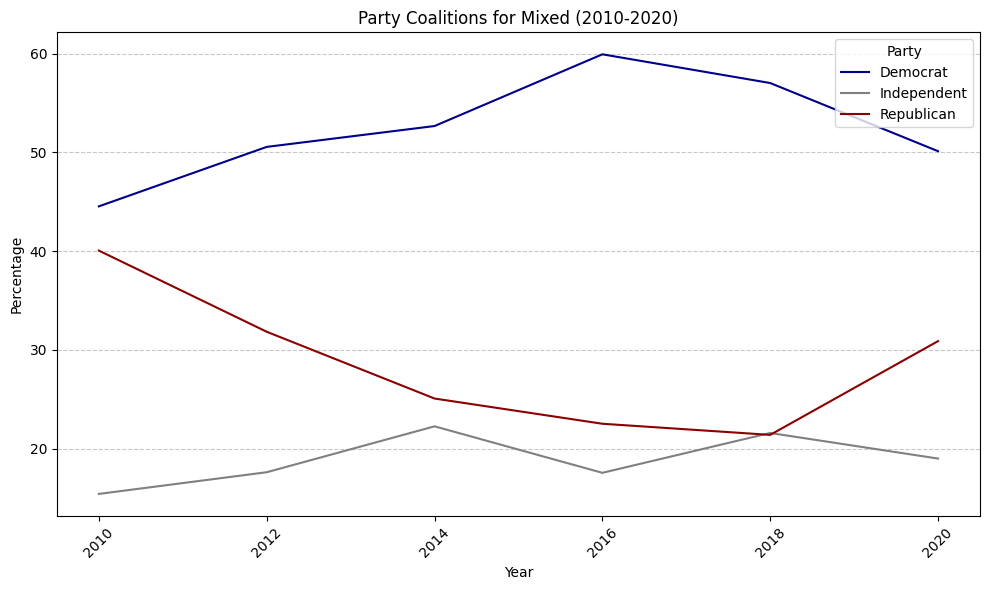

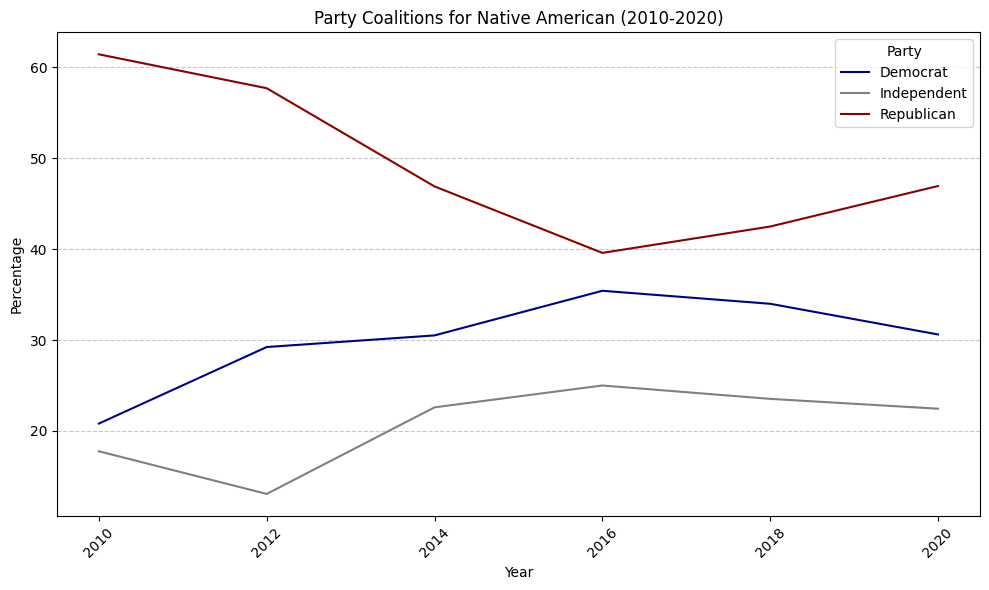

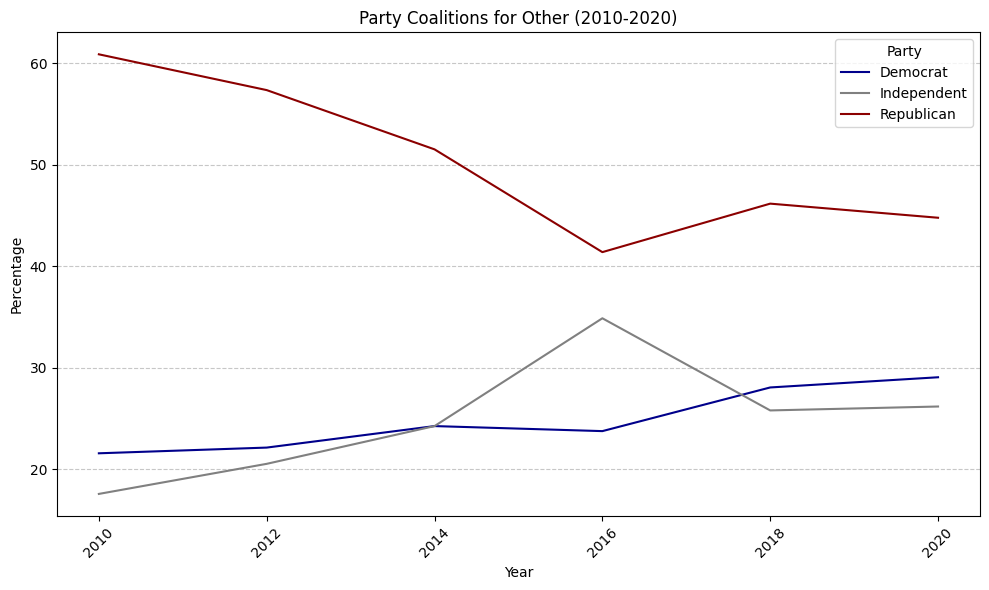

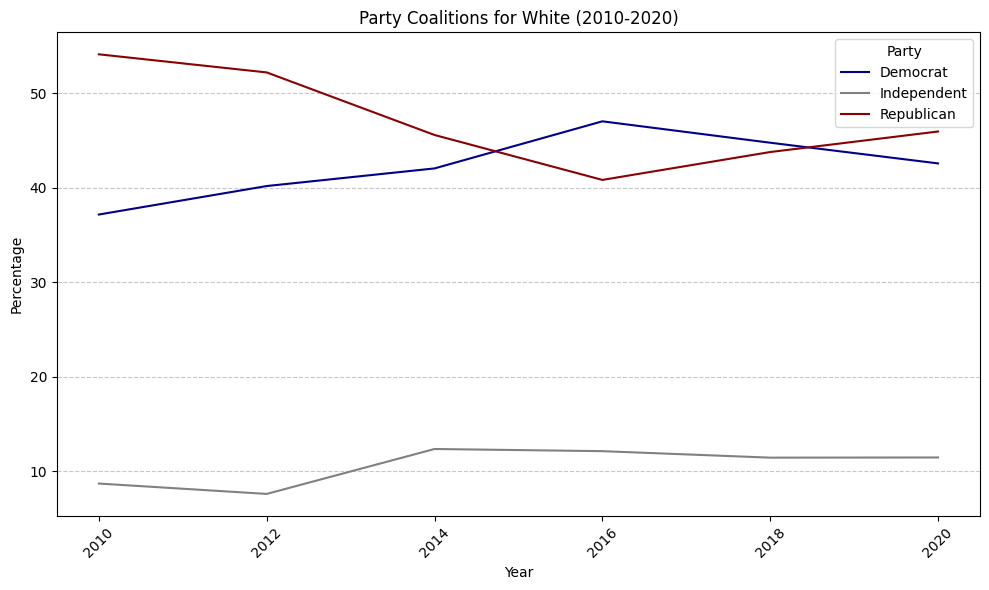

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data_ces

# Focus on relevant columns
relevant_columns = ['year', 'race', 'gender', 'educ', 'pid7', 'voted_pres_party']
ces_subset = data_ces[relevant_columns]

# Mapping party affiliation to binary categories for analysis (simplify the 'pid7' scale)
party_mapping = {
    "Strong Democrat": "Democrat",
    "Not very strong Democrat": "Democrat",
    "Lean Democrat": "Democrat",
    "Independent": "Independent",
    "Lean Republican": "Republican",
    "Not very strong Republican": "Republican",
    "Strong Republican": "Republican",
    "Other": "Other"
}
ces_subset.loc[:, 'party'] = ces_subset['pid7'].map(party_mapping)

# Analyze by year and demographic groups
grouped = ces_subset.groupby(['year', 'race', 'party']).size().reset_index(name='count')

# Calculate the percentage of each demographic group in each year by party
grouped['total'] = grouped.groupby(['year', 'race'])['count'].transform('sum')
grouped['percent'] = (grouped['count'] / grouped['total']) * 100

# Pivot data to make plotting easier
pivot_data = grouped.pivot_table(index='year', columns=['race', 'party'], values='percent', fill_value=0)

# Define colors for each party
party_colors = {
    'Democrat': 'darkblue',
    'Republican': 'darkred',
    'Independent': 'grey'
}

# Separate visualizations for each race
races = pivot_data.columns.get_level_values(0).unique()

for race in races:
    fig, ax = plt.subplots(figsize=(10, 6))
    parties = pivot_data[race].columns

    for party in parties:
        if party in party_colors:
            ax.plot(pivot_data.index, pivot_data[(race, party)], label=party, color=party_colors[party])

    # Adding labels and title
    ax.set_title(f'Party Coalitions for {race} (2010-2020)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')
    ax.set_xticks(pivot_data.index)  # Ensure all years are included in the x-axis
    ax.set_xticklabels(pivot_data.index, rotation=45)
    ax.legend(title='Party', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()